# Importing libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the data

In [45]:
cities = pd.read_csv('/Users/admin/Desktop/ML project/Code/Regression/cities.csv') 
movehubqualityoflife = pd.read_csv('/Users/admin/Desktop/ML project/Code/Regression/movehubqualityoflife.csv')
movehubcostofliving = pd.read_csv('/Users/admin/Desktop/ML project/Code/Regression/movehubcostofliving.csv')

# Data Preprocessing

In [46]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3543 entries, 0 to 3542
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   City     3543 non-null   object
 1   Country  3540 non-null   object
dtypes: object(2)
memory usage: 55.5+ KB


In [47]:
missing_values = cities.isnull().sum()
print(missing_values)

City       0
Country    3
dtype: int64


## Take care of missing values

In [48]:
cities.iloc[654,1]='Ukraine'
cities.iloc[724,1]='Russia'
cities.iloc[1529,1]='Kosovo'

In [49]:
#Make sure there's no missing values
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3543 entries, 0 to 3542
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   City     3543 non-null   object
 1   Country  3543 non-null   object
dtypes: object(2)
memory usage: 55.5+ KB


In [50]:
#Checking other 2 datasets
movehubqualityoflife.info()
movehubcostofliving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             216 non-null    object 
 1   Movehub Rating   216 non-null    float64
 2   Purchase Power   216 non-null    float64
 3   Health Care      216 non-null    float64
 4   Pollution        216 non-null    float64
 5   Quality of Life  216 non-null    float64
 6   Crime Rating     216 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   216 non-null    object 
 1   Cappuccino             216 non-null    float64
 2   Cinema                 216 non-null    float64
 3   Wine                   216 non-null    float64
 4   Gasoline

## Mergining the dataset 


In [51]:
movehubcity = pd.merge(movehubqualityoflife, movehubcostofliving, how ='outer')

#Sorting data by 'City'
movehubcity = movehubcity.sort_values(by='City')

#Modification of the values of the index
movehubcity.reset_index(drop = True)

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
0,Aachen,81.64,60.55,73.25,11.69,90.52,15.34,2.05,6.88,4.26,1.33,767.23,1619.72
1,Aberdeen,81.89,49.70,82.86,34.31,76.77,24.22,1.99,6.98,5.98,1.37,1195.74,1743.78
2,Abu Dhabi,86.40,68.03,48.02,53.42,80.80,10.86,2.67,6.23,13.73,0.30,1779.93,2135.92
3,Addis Ababa,59.88,6.38,63.89,85.59,28.41,26.04,0.46,2.29,4.18,0.72,653.77,124.22
4,Adelaide,87.29,72.03,56.25,12.01,91.54,41.32,2.49,11.42,10.08,0.95,1382.26,2911.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Warsaw,76.76,35.77,63.33,86.16,51.82,32.03,1.66,5.19,5.19,1.18,726.59,664.31
212,Washington,81.74,56.61,64.44,30.55,76.92,51.43,2.37,7.85,7.85,0.69,2451.63,2484.32
213,Wellington,81.06,49.11,73.72,30.55,79.83,27.38,2.20,8.82,8.27,1.17,1515.65,1763.67
214,Zagreb,73.84,26.71,52.78,83.45,47.59,32.29,1.12,3.70,4.48,1.23,504.36,605.23


In [52]:
#Insert column country to dataset and create data.
data= pd.merge(movehubcity, cities, how = 'left',on='City')

#Rechecking NaN values after merge
data.info()
data[data['Country'].isnull()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 227
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   228 non-null    object 
 1   Movehub Rating         228 non-null    float64
 2   Purchase Power         228 non-null    float64
 3   Health Care            228 non-null    float64
 4   Pollution              228 non-null    float64
 5   Quality of Life        228 non-null    float64
 6   Crime Rating           228 non-null    float64
 7   Cappuccino             228 non-null    float64
 8   Cinema                 228 non-null    float64
 9   Wine                   228 non-null    float64
 10  Gasoline               228 non-null    float64
 11  Avg Rent               228 non-null    float64
 12  Avg Disposable Income  228 non-null    float64
 13  Country                198 non-null    object 
dtypes: float64(12), object(2)
memory usage: 26.7+ KB


,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Country
10,Asheville,83.17,70.51,79.02,30.55,81.34,30.21,1.80,5.88,7.85,0.64,1225.82,1898.54,NaN
51,Cebu,66.93,12.90,73.70,35.90,41.21,46.88,1.43,2.85,3.48,0.88,475.01,200.28,NaN
61,Cordoba,73.76,27.56,75.24,48.76,47.68,51.56,1.95,3.92,4.25,0.93,524.80,523.02,NaN
66,Davao,69.29,17.63,69.00,77.98,30.66,17.71,0.79,1.90,3.17,0.84,554.18,158.34,NaN
74,Dusseldorf,83.45,72.52,75.98,8.61,88.02,15.34,2.13,8.31,4.47,1.28,1193.48,2301.70,NaN
79,Frankfurt,82.75,62.60,65.33,14.54,88.04,27.55,2.13,7.67,4.07,1.36,1022.98,1875.46,NaN
81,Galway,83.19,58.59,52.97,52.47,77.85,40.78,2.13,7.67,6.39,1.39,852.48,1875.46,NaN
100,Istanbul,80.22,34.42,80.38,44.98,45.67,42.36,1.99,5.44,9.06,1.66,634.23,724.84,NaN
101,Izmir,76.07,32.12,57.33,30.55,42.90,25.91,1.81,4.71,7.25,1.69,543.63,590.57,NaN
122,Lodz,73.32,26.37,53.21,37.21,46.29,64.51,1.45,4.77,4.15,1.18,337.35,415.20,NaN


In [53]:
#Taking care of missing values after merge
data.iloc[10,13]='United States' 
data.iloc[51,13]='Philippines'
data.iloc[61,13]='Argentina'
data.iloc[66,13]='Philippines' 
data.iloc[74,13]='Germany'
data.iloc[79,13]='Germany'
data.iloc[81,13]='Ireland'
data.iloc[100,13]='Turkey'
data.iloc[101,13]='Turkey'
data.iloc[122,13]='Poland'
data.iloc[129,13]='Spain'
data.iloc[130,13]='Scania'
data.iloc[134,13]='Spain'
data.iloc[136,13]='Colombia'
data.iloc[139,13]='United States'
data.iloc[141,13]='United States'
data.iloc[164,13]='Thailand'
data.iloc[166,13]='United States'
data.iloc[167,13]='United States'
data.iloc[168,13]='United States'
data.iloc[176,13]='Brazil'
data.iloc[178,13]='United States'
data.iloc[183,13]='United States'
data.iloc[184,13]='United States'
data.iloc[185,13]='United States'
data.iloc[188,13]='Brazil'
data.iloc[193,13]='Malta'
data.iloc[201,13]='United States'
data.iloc[224,13]='United states'
data.iloc[227,13]='Switzerland'

#Update wrong names of some of the cities
data.iloc[224,0]='Washington D.C'
data.iloc[66,0]='Davao City'

#Checking again for NAN's
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 227
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   228 non-null    object 
 1   Movehub Rating         228 non-null    float64
 2   Purchase Power         228 non-null    float64
 3   Health Care            228 non-null    float64
 4   Pollution              228 non-null    float64
 5   Quality of Life        228 non-null    float64
 6   Crime Rating           228 non-null    float64
 7   Cappuccino             228 non-null    float64
 8   Cinema                 228 non-null    float64
 9   Wine                   228 non-null    float64
 10  Gasoline               228 non-null    float64
 11  Avg Rent               228 non-null    float64
 12  Avg Disposable Income  228 non-null    float64
 13  Country                228 non-null    object 
dtypes: float64(12), object(2)
memory usage: 26.7+ KB


In [54]:
#Replace '' in column names by '_' and view the final dataset
data.columns = data.columns.str.replace(' ','_')

# Data Visualisation

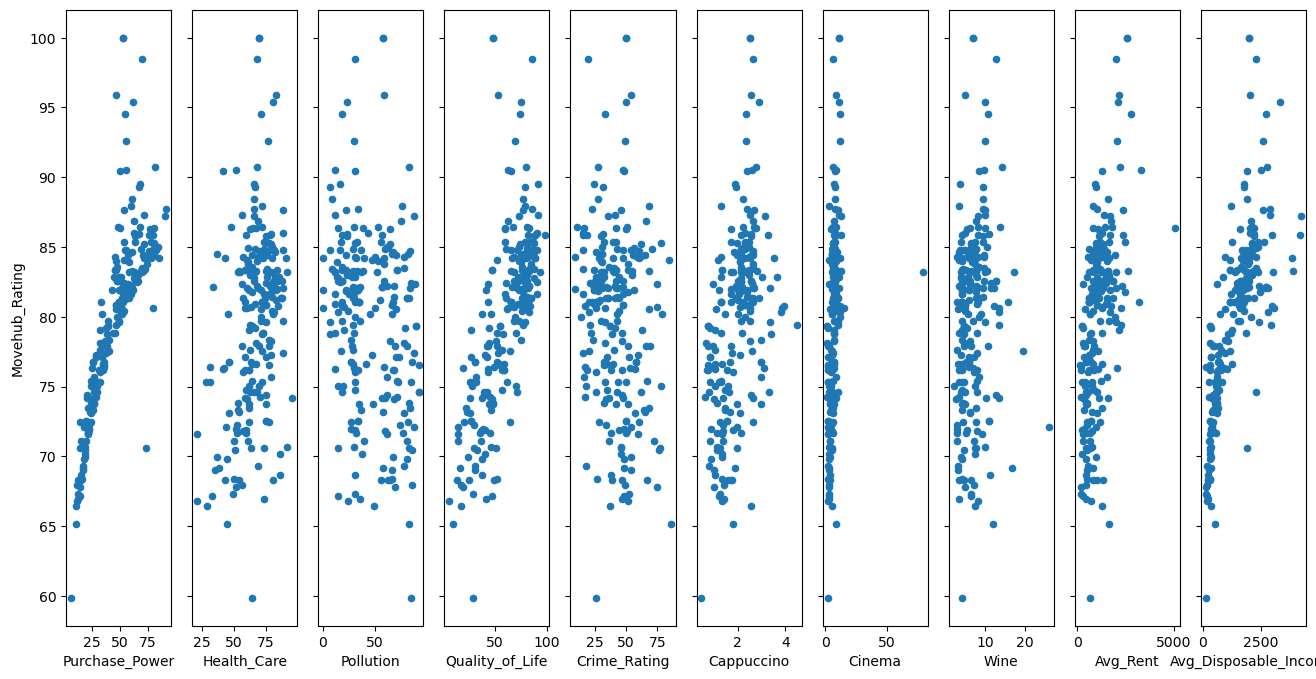

In [55]:
fig, axs = plt.subplots(1, 10, sharey=True)
data.plot(kind='scatter', x='Purchase_Power', y='Movehub_Rating', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Health_Care', y='Movehub_Rating', ax=axs[1])
data.plot(kind='scatter', x='Pollution', y='Movehub_Rating', ax=axs[2])
data.plot(kind='scatter', x='Quality_of_Life', y='Movehub_Rating', ax=axs[3])
data.plot(kind='scatter', x='Crime_Rating', y='Movehub_Rating', ax=axs[4])
data.plot(kind='scatter', x='Cappuccino', y='Movehub_Rating', ax=axs[5])
data.plot(kind='scatter', x='Cinema', y='Movehub_Rating', ax=axs[6])
data.plot(kind='scatter', x='Wine', y='Movehub_Rating', ax=axs[7])
data.plot(kind='scatter', x='Avg_Rent', y='Movehub_Rating', ax=axs[8])
data.plot(kind='scatter', x='Avg_Disposable_Income', y='Movehub_Rating', ax=axs[9])
plt.show()

In [56]:
#Droping outliers
data = data.loc[(data['Movehub_Rating'] >= 65)]

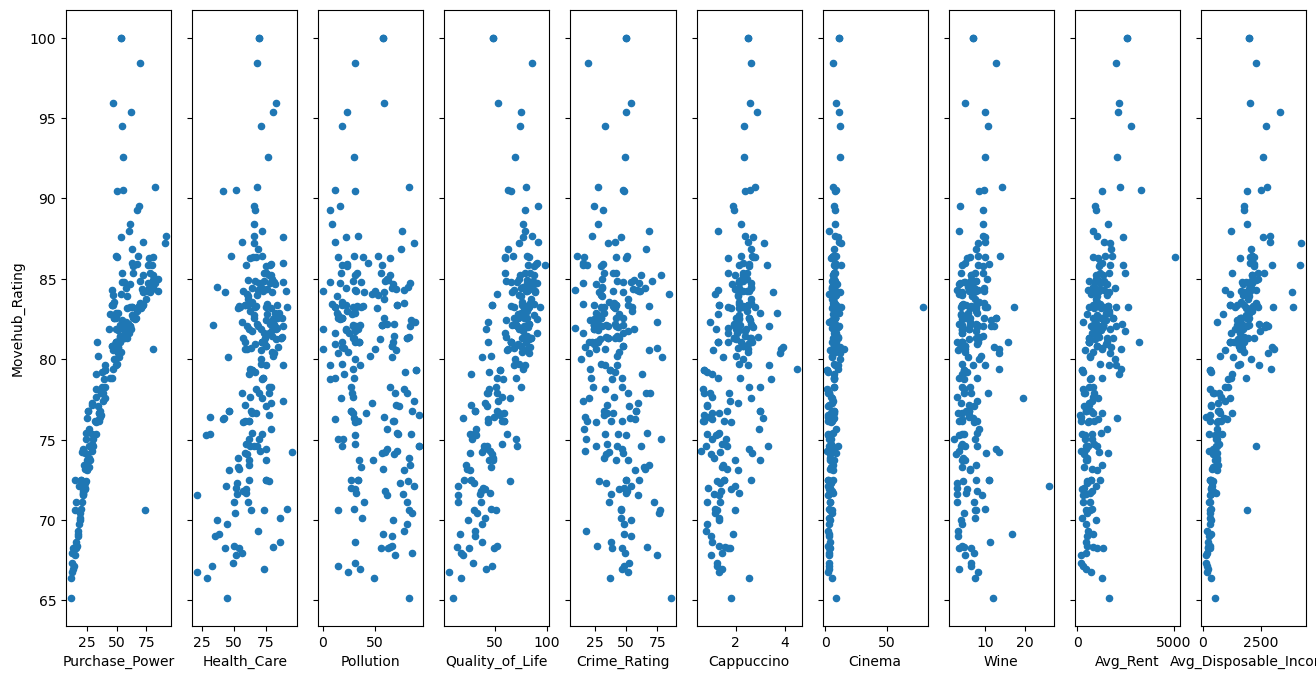

In [57]:
fig, axs = plt.subplots(1, 10, sharey=True)
data.plot(kind='scatter', x='Purchase_Power', y='Movehub_Rating', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Health_Care', y='Movehub_Rating', ax=axs[1])
data.plot(kind='scatter', x='Pollution', y='Movehub_Rating', ax=axs[2])
data.plot(kind='scatter', x='Quality_of_Life', y='Movehub_Rating', ax=axs[3])
data.plot(kind='scatter', x='Crime_Rating', y='Movehub_Rating', ax=axs[4])
data.plot(kind='scatter', x='Cappuccino', y='Movehub_Rating', ax=axs[5],figsize=(16, 8))
data.plot(kind='scatter', x='Cinema', y='Movehub_Rating', ax=axs[6])
data.plot(kind='scatter', x='Wine', y='Movehub_Rating', ax=axs[7])
data.plot(kind='scatter', x='Avg_Rent', y='Movehub_Rating', ax=axs[8])
data.plot(kind='scatter', x='Avg_Disposable_Income', y='Movehub_Rating', ax=axs[9])
plt.show()

# Splitting data into Training and Test sets

In [58]:
from sklearn.model_selection import train_test_split
X = data.drop(['Movehub_Rating','Country','City'], axis = 1) 
y = data['Movehub_Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


## Creating a Liniar Regression

In [59]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

### Making the prediction

In [66]:
y_pred_linear_reg = linear_reg.predict(X_test)

### Evaluation

In [70]:
from sklearn.metrics import mean_squared_error
mean_squared_error=mean_squared_error(y_test, y_pred_linear_reg)

#to print summary statistics
import statsmodels.formula.api as sm
import statsmodels.api as sm


#Adding intercept trems to X_train
X_train_mod = np.append(arr = np.ones((X_train.shape[0],1)).astype(int),values = X_train,axis = 1)
regressor_OLS = sm.OLS(endog=y_train, exog=X_train_mod).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Movehub_Rating   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     57.34
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           3.26e-51
Time:                        18:10:52   Log-Likelihood:                -441.65
No. Observations:                 181   AIC:                             907.3
Df Residuals:                     169   BIC:                             945.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.0819      2.407     24.962      0.000      55.330      64.833
x1             0.2562      0.028      9.059      0.000       0.200       0.312
x2             0.0038      0.019      0.202      0.840      -0.033       0.040
x3             0.0044      0.010      0.451      0.653      -0.015       0.024
x4             0.0341      0.025      1.343      0.181      -0.016       0.084
x5             0.0160      0.017      0.950      0.343      -0.017       0.049
x6            -0.9368      0.510     -1.838      0.068      -1.943       0.069
x7             0.2441      0.180      1.353      0.178      -0.112       0.600
x8             0.1248      0.096      1.300      0.195      -0.065       0.314
x9             2.9488      0.940      3.136      0.002       1.093       4.805
x10            0.0038      0.001      5.652      0.000       0.002       0.005
x11           -0.0022      0.001     -2.779      0.006      -0.004      -0.001
==============================================================================
Omnibus:                       39.232   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.731
Skew:                           0.634   Prob(JB):                     2.12e-45
Kurtosis:                       8.067   Cond. No.                     2.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
print("Mean Squared Error(MSE) of the test set: {:.3f} ".format(mean_squared_error))


Mean Squared Error(MSE) of the test set: 22.923 


### Drop variables and do train_test_split

In [72]:
X = data.drop(['Movehub_Rating','Country','City','Health_Care','Pollution','Quality_of_Life','Crime_Rating','Cinema','Wine'], axis = 1) 
y = data['Movehub_Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [73]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()


## Making the prediction

In [74]:
y_pred_linear_reg = linear_reg.predict(X_test)


In [76]:
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(y_test, y_pred_linear_reg)

#to print summary statistics
import statsmodels.formula.api as sm
import statsmodels.api as sm

#Adding intercept trems to X_train
X_train_mod = np.append(arr = np.ones((X_train.shape[0],1)).astype(int),values = X_train,axis = 1)
regressor_OLS = sm.OLS(endog=y_train, exog=X_train_mod).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Movehub_Rating   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     125.6
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           5.60e-56
Time:                        18:18:19   Log-Likelihood:                -444.46
No. Observations:                 181   AIC:                             900.9
Df Residuals:                     175   BIC:                             920.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.2475      1.237     51.138      0.000      60.807      65.688
x1             0.2648      0.023     11.584      0.000       0.220       0.310
x2            -0.4442      0.433     -1.027      0.306      -1.298       0.409
x3             2.7958      0.681      4.104      0.000       1.451       4.140
x4             0.0040      0.001      6.425      0.000       0.003       0.005
x5            -0.0015      0.001     -2.080      0.039      -0.003   -7.69e-05
==============================================================================
Omnibus:                       38.808   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.454
Skew:                           0.640   Prob(JB):                     3.61e-43
Kurtosis:                       7.927   Cond. No.                     1.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
print("Mean Squared Error(MSE) of the test set: {:.3f} ".format(mean_squared_error))


Mean Squared Error(MSE) of the test set: 19.350 



# Creating a Support Vector Regression (SVR)

In [78]:
X = data.drop(['Movehub_Rating','Country','City'], axis = 1) 
y = data['Movehub_Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [79]:
from sklearn.svm import SVR
regressor = SVR(kernel ='linear')
regressor.fit(X_train, y_train)

SVR(kernel='linear')

## Making a prediction

In [80]:
y_pred_SVR = regressor.predict(X_test)


In [81]:
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(y_test, y_pred_SVR)

In [82]:
print("Mean Squared Error(MSE) of the test set: {:.3f} ".format(mean_squared_error))


Mean Squared Error(MSE) of the test set: 21.480 
